In [9]:
##  Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load and Preview All Major Datasets

In [10]:
# Load data
scrap_df     = pd.read_csv('data/scrap_log.csv', parse_dates=['date'])
impurity_df  = pd.read_csv('data/impurity_log.csv', parse_dates=['date'])
defects_df   = pd.read_csv('data/defects_log.csv', parse_dates=['date'])

# Peek at datasets
print(scrap_df.head())


        date    supplier metal_type  weight_kg
0 2025-01-02  Supplier A  Aluminium       1200
1 2025-01-05  Supplier B       Zinc        900
2 2025-01-07  Supplier A  Aluminium       1150
3 2025-01-08  Supplier C  Aluminium        980
4 2025-02-01  Supplier B       Zinc        850


In [4]:
print(impurity_df.head())


        date    supplier  impurity_percent
0 2025-01-02  Supplier A              0.18
1 2025-01-05  Supplier B              0.25
2 2025-01-07  Supplier A              0.16
3 2025-01-08  Supplier C              0.20
4 2025-02-01  Supplier B              0.27


In [5]:
print(defects_df.head())

        date batch_id  defective  total defect_type    supplier
0 2025-01-02     B001          5    100    Porosity  Supplier A
1 2025-01-05     B002          8    120       Crack  Supplier B
2 2025-01-07     B003          4    110   Cold Shut  Supplier A
3 2025-01-08     B004          6    105    Porosity  Supplier C
4 2025-02-01     B005          9    130   Blow Hole  Supplier B


## Data Cleaning

In [11]:
scrap_df['weight_kg'] = scrap_df['weight_kg'].fillna(0)
impurity_df['impurity_percent'] = impurity_df['impurity_percent'].fillna(impurity_df['impurity_percent'].mean())
defects_df['defective'] = defects_df['defective'].fillna(0)
defects_df['total'] = defects_df['total'].fillna(defects_df['total'].mean())



## Merge and Prepare Data for Integrated Analysis

In [12]:
# Monthly scrap inflow by supplier and metal
scrap_df['month'] = scrap_df['date'].dt.to_period('M')
monthly_scrap = scrap_df.groupby(['month', 'metal_type'])['weight_kg'].sum().reset_index()

# Mean impurity percent per supplier (entire period)
impurities_by_supplier = impurity_df.groupby('supplier')['impurity_percent'].mean().reset_index()

# Summary defect rates per supplier and batch
defects_df['defect_percent'] = 100 * defects_df['defective'] / defects_df['total']
batch_defect_summary = defects_df.groupby(['batch_id', 'supplier']).agg(
    total_produced=('total', 'sum'),
    defect_pct=('defect_percent', 'mean')
).reset_index()


##  Advanced Analytics — Correlation & Key Supplier Insights

In [13]:
# Merge defect data with impurity by supplier
merged = batch_defect_summary.merge(impurities_by_supplier, on='supplier', how='left')

# Basic correlation between impurity and average batch defect rate
corr = merged['defect_pct'].corr(merged['impurity_percent'])
print(f'Correlation between supplier impurity and defect rate: {corr:.2f}')


Correlation between supplier impurity and defect rate: 0.85


## Visualization — Key Charts for Dashboard

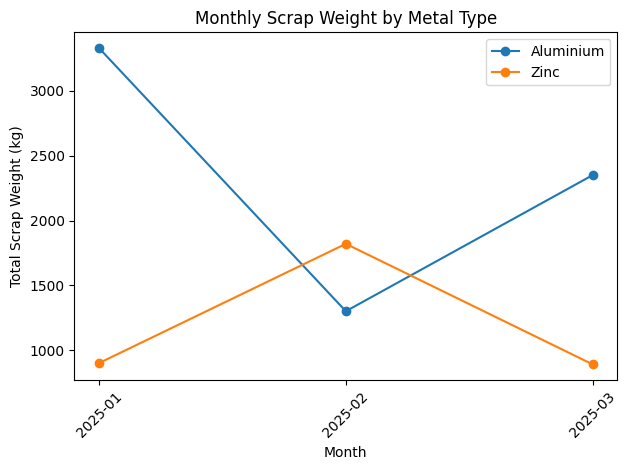

In [14]:
# Plot 1: Scrap intake by metal type per month
for metal in monthly_scrap['metal_type'].unique():
    plt.plot(
        monthly_scrap[monthly_scrap['metal_type'] == metal]['month'].astype(str),
        monthly_scrap[monthly_scrap['metal_type'] == metal]['weight_kg'],
        marker='o',
        label=metal,
    )
plt.title('Monthly Scrap Weight by Metal Type')
plt.xlabel('Month')
plt.ylabel('Total Scrap Weight (kg)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

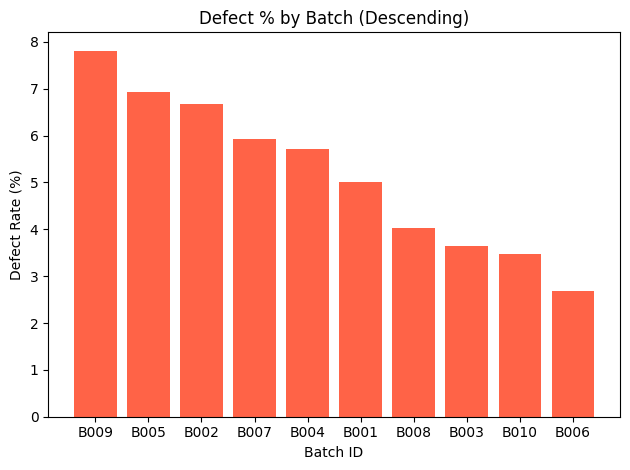

In [15]:
# Plot 2: Defect % by batch (sorted for focus)
sorted_defects = batch_defect_summary.sort_values('defect_pct', ascending=False)
plt.bar(sorted_defects['batch_id'].astype(str), sorted_defects['defect_pct'], color='tomato')
plt.title('Defect % by Batch (Descending)')
plt.xlabel('Batch ID')
plt.ylabel('Defect Rate (%)')
plt.tight_layout()
plt.show()

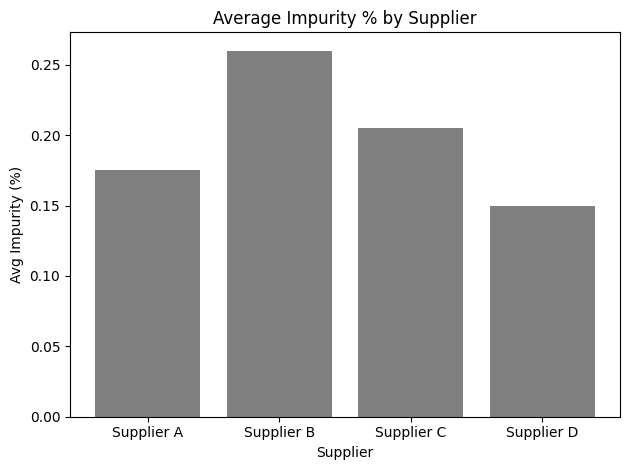

In [16]:
# Plot 3: Avg impurity % by supplier
plt.bar(impurities_by_supplier['supplier'], impurities_by_supplier['impurity_percent'], color='gray')
plt.title('Average Impurity % by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Avg Impurity (%)')
plt.tight_layout()
plt.show()

## Automated CSV/Excel Reporting

In [19]:
monthly_scrap.to_csv('reports/monthly_scrap_summary.csv', index=False)
impurities_by_supplier.to_csv('reports/impurity_by_supplier.csv', index=False)
batch_defect_summary.to_csv('reports/batch_defect_summary.csv', index=False)

print("Reports generated in /reports/ folder!")

Reports generated in /reports/ folder!
